In this code we are plotting the number of comments per user and checking which users make more comments.

Connected to MongoDB!


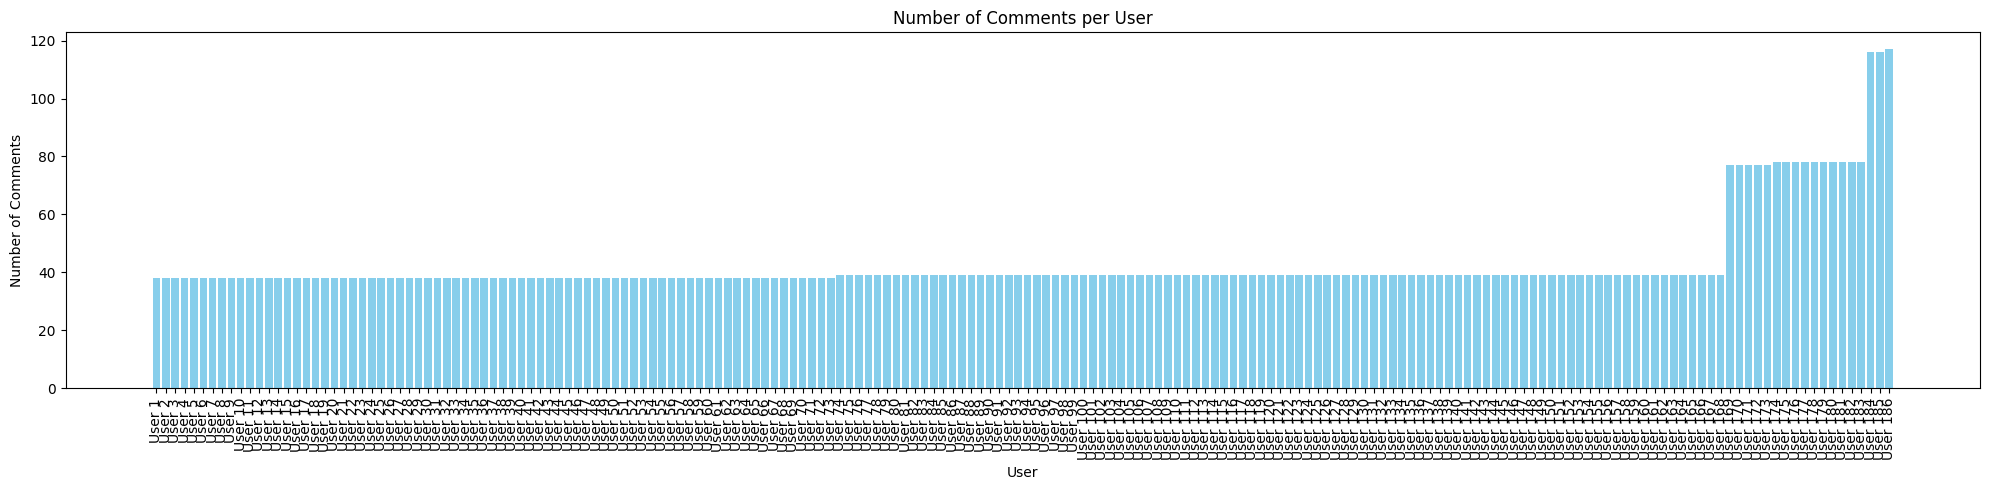

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pymongo import MongoClient
from bson import ObjectId  # Import ObjectId to handle ObjectIds

# Connect to the MongoDB database
client = MongoClient(myclient.os.getenv('db_url_for_creating'))
db = client[myclient.os.getenv('db_name')] 

try:
    # Test the connection
    client.admin.command('ping')
    print("Connected to MongoDB!")
except Exception as e:
    print(f"Connection failed: {e}")

# Load collections into DataFrames
comments = pd.DataFrame(list(db.comments.find()))
users = pd.DataFrame(list(db.users.find()))

# Create a dictionary to store the count of comments per user
user_comment_count = {}

# Count the comments per user by iterating over the DataFrame
for index, comment in comments.iterrows():  # Using .iterrows() to iterate row-wise
    userId = comment.get('userId')  # Safely get 'userId'
    if isinstance(userId, ObjectId):  # Check if userId is an ObjectId
        userId = str(userId)  # Convert ObjectId to string for easier counting
    if userId:
        if userId in user_comment_count:
            user_comment_count[userId] += 1
        else:
            user_comment_count[userId] = 1

# Convert to DataFrame for easier plotting
df = pd.DataFrame(list(user_comment_count.items()), columns=['userId', 'comment_count'])

# Optional: Sort users by the number of comments
df = df.sort_values(by='comment_count').reset_index(drop=True)

# Create a new column with labels "User 1", "User 2", etc.
df['user_label'] = ['User ' + str(i + 1) for i in range(len(df))]

# Plotting
plt.figure(figsize=(20, 5))  # Set the size of the plot
plt.bar(df['user_label'], df['comment_count'], color='skyblue')  # Create a bar chart

# Adding labels and title
plt.xlabel('User')
plt.ylabel('Number of Comments')
plt.title('Number of Comments per User')
plt.xticks(rotation=90)  # Rotate user labels for better readability if necessary

# Show the plot
plt.tight_layout()
plt.show()


In [5]:
# Filter to get the exact users by their labels instead of relying on index
target_users = df[df['user_label'].isin(['User 184', 'User 185', 'User 186'])]

# Display their usernames and IDs
for _, user in target_users.iterrows():
    print(f"{user['user_label']}:")
    print(f"User ID: {user['userId']}")
    
    # Lookup and print the username if available in the users collection
    user_info = users[users['_id'] == ObjectId(user['userId'])]
    if not user_info.empty:
        print(f"Username: {user_info.iloc[0]['username']}")
    else:
        print("Username not found")
    print("\n")  # Add spacing between user outputs

User 184:
User ID: 671a282df3c4d9b2c377842e
Username: Dunkelschiefergraues Kaninchen


User 185:
User ID: 671a282bf3c4d9b2c37783c5
Username: Dunkelschiefergrauer Astronaut


User 186:
User ID: 671a282cf3c4d9b2c37783ef
Username: Darkslategray-Wissenschaftler


